<a href="https://colab.research.google.com/github/student64-ahmadi/Impulsive-Hamiltonian-Dynamics/blob/main/Analyse_des_Ondes_Gravitationnelles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Λ=1.0e+05, A=1.0e-46


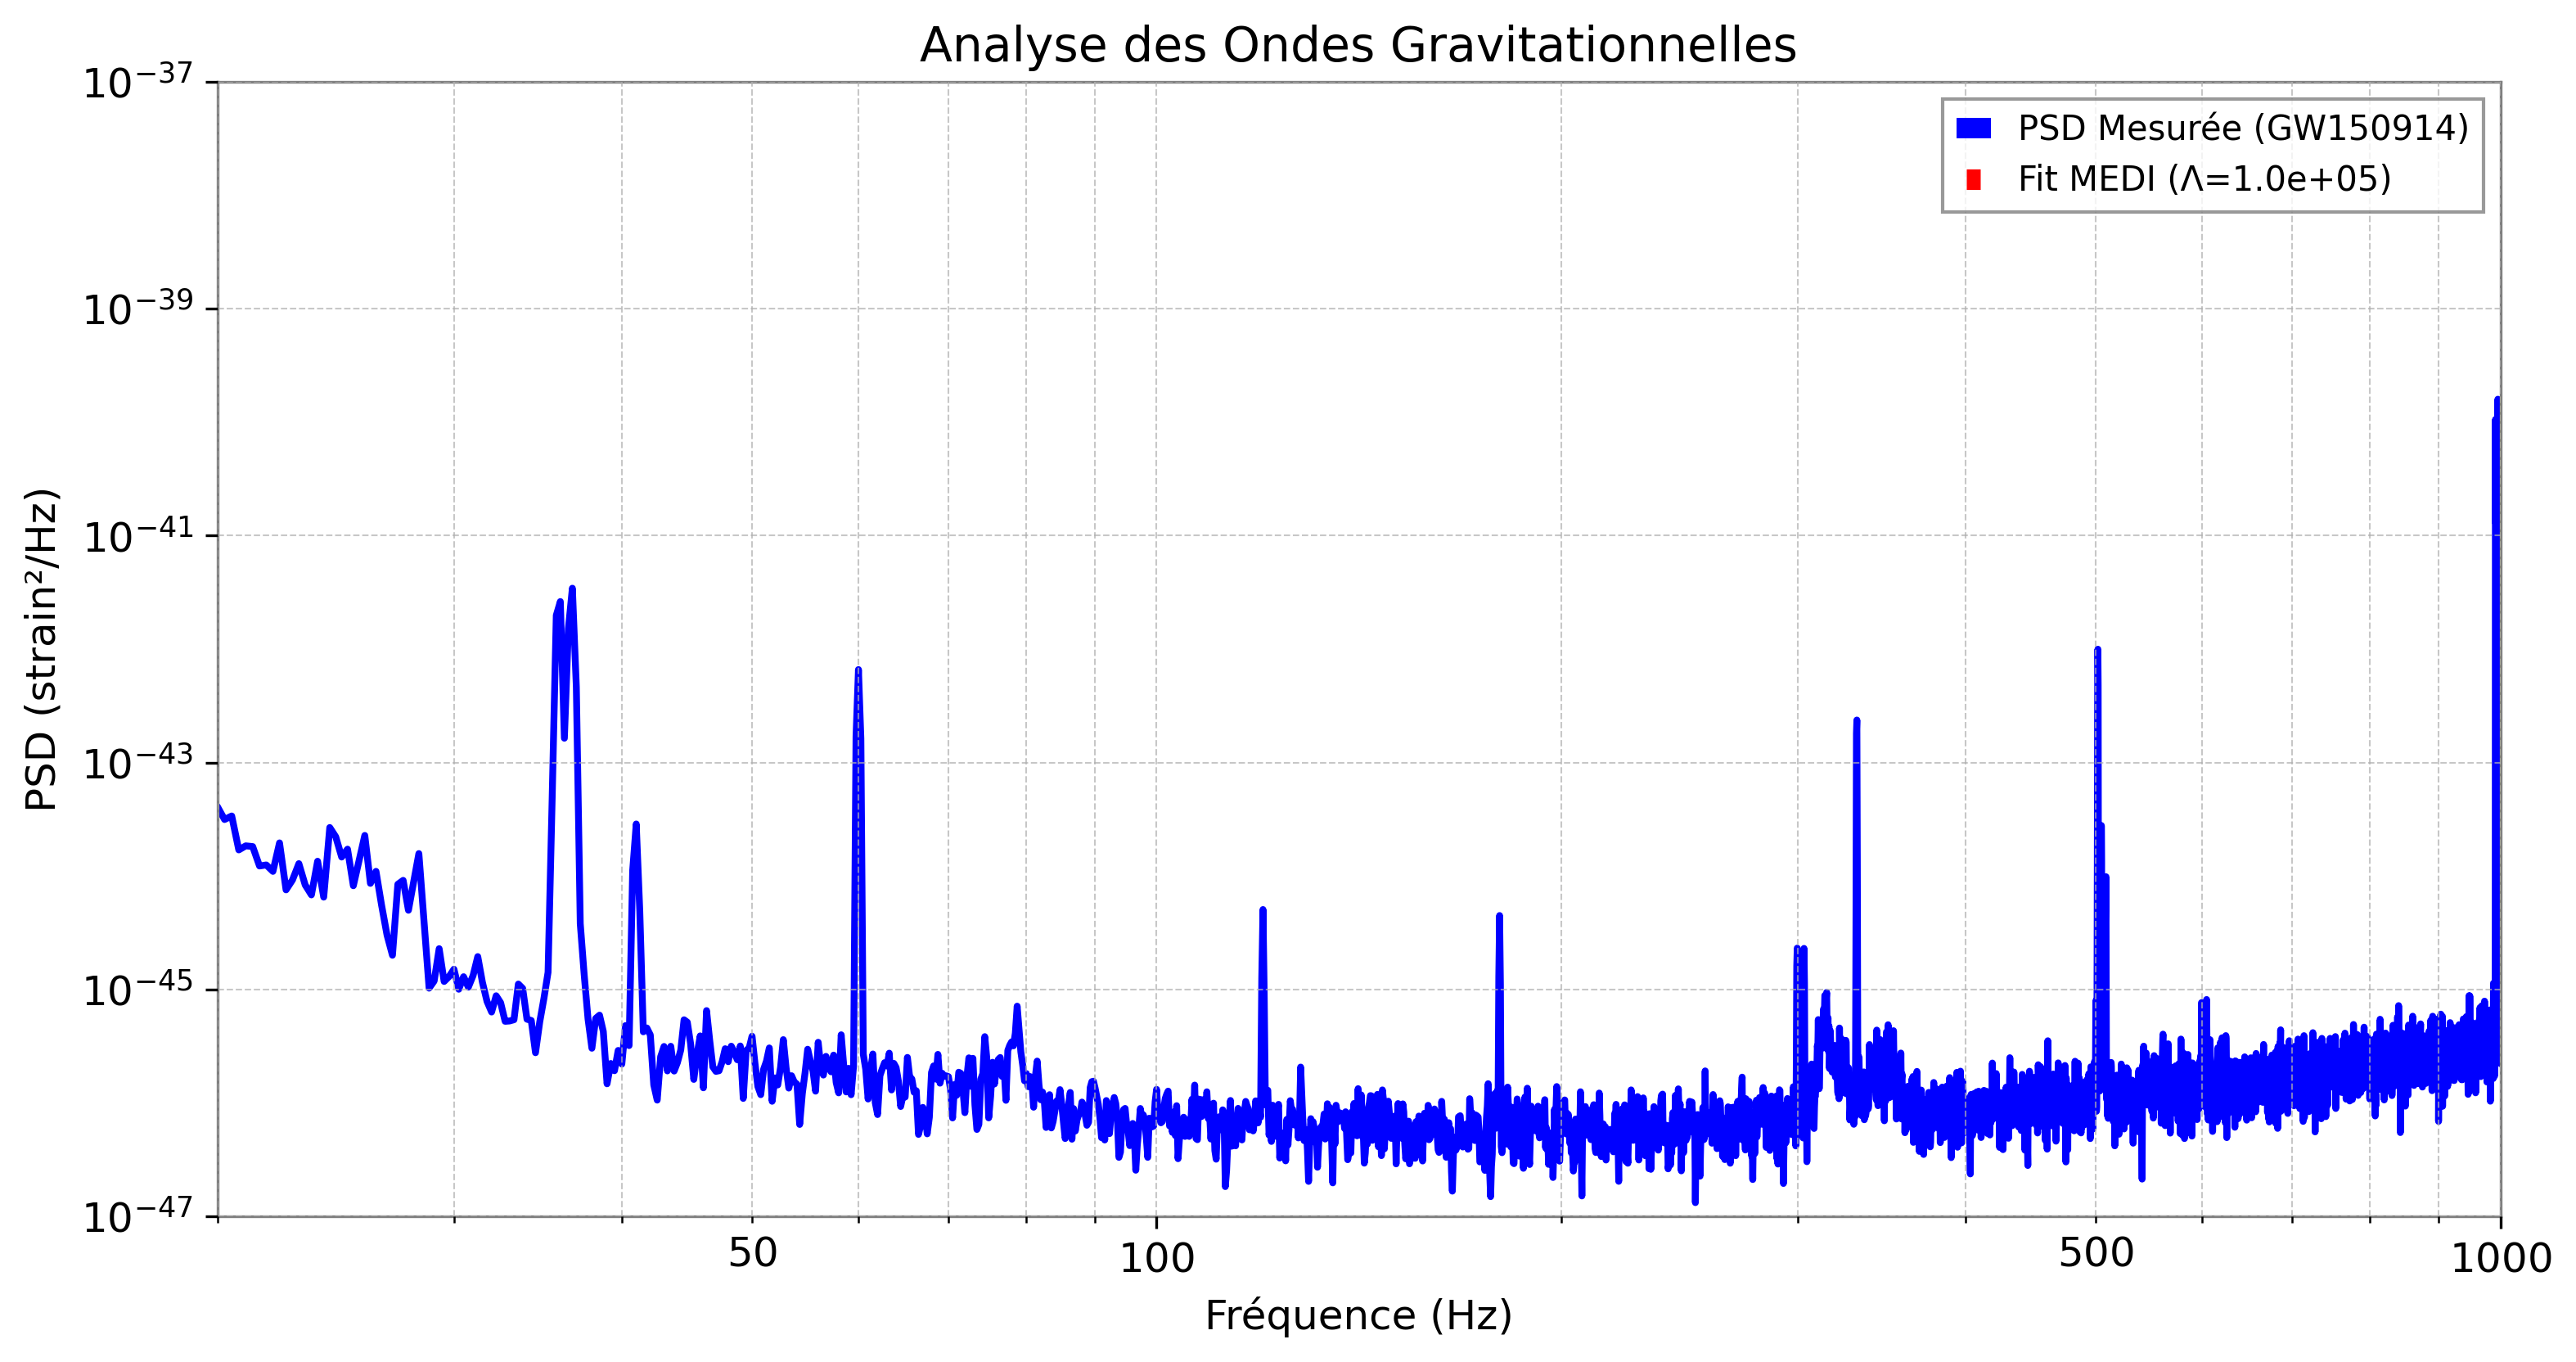

Output PDF saved as 'output.pdf'.


In [4]:
!pip install gwpy gwosc pycbc scipy numpy matplotlib

from gwpy.timeseries import TimeSeries
from gwosc.datasets import event_gps
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Récupérer GW150914
gps = event_gps("GW150914")
start, end = gps - 16, gps + 16
data = TimeSeries.fetch_open_data("H1", start, end, sample_rate=4096)

# Calculer le PSD (garder l'objet FrequencySeries)
psd_measured = data.psd(fftlength=4, overlap=2)  # Pas de .value ici
freq = psd_measured.frequencies.value  # Récupérer les fréquences
psd_values = psd_measured.value  # Récupérer les valeurs du PSD pour le calcul

# Protocole MEDI
def loss(params):
    Lambda, A = params
    model = (freq**2) / (Lambda**4) + A * psd_values
    return np.sum((psd_values - model)**2)

res = minimize(loss, [1e5, 1e-46], bounds=[(1e4, 1e6), (1e-50, 1e-40)])
Lambda, A = res.x
print(f"Λ={Lambda:.1e}, A={A:.1e}")

# Plot
plt.figure(figsize=(12, 6), dpi=300)
plt.loglog(freq, psd_values, 'b-', lw=2, label="PSD Mesurée (GW150914)")
psd_fit = (freq**2)/(Lambda**4) + A * psd_values
plt.loglog(freq, psd_fit, 'r--', lw=2, label=f"Fit MEDI (Λ={Lambda:.1e})")
plt.xlabel("Fréquence (Hz)", fontsize=12)
plt.ylabel("PSD (strain²/Hz)", fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.legend(fontsize=10)
plt.title("Analyse des Ondes Gravitationnelles", fontsize=14)

# Limiter la plage de fréquences pour mieux voir le signal
plt.xlim(20, 1000)
plt.ylim(1e-47, 1e-37)

plt.savefig("output.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print("Output PDF saved as 'output.pdf'.")

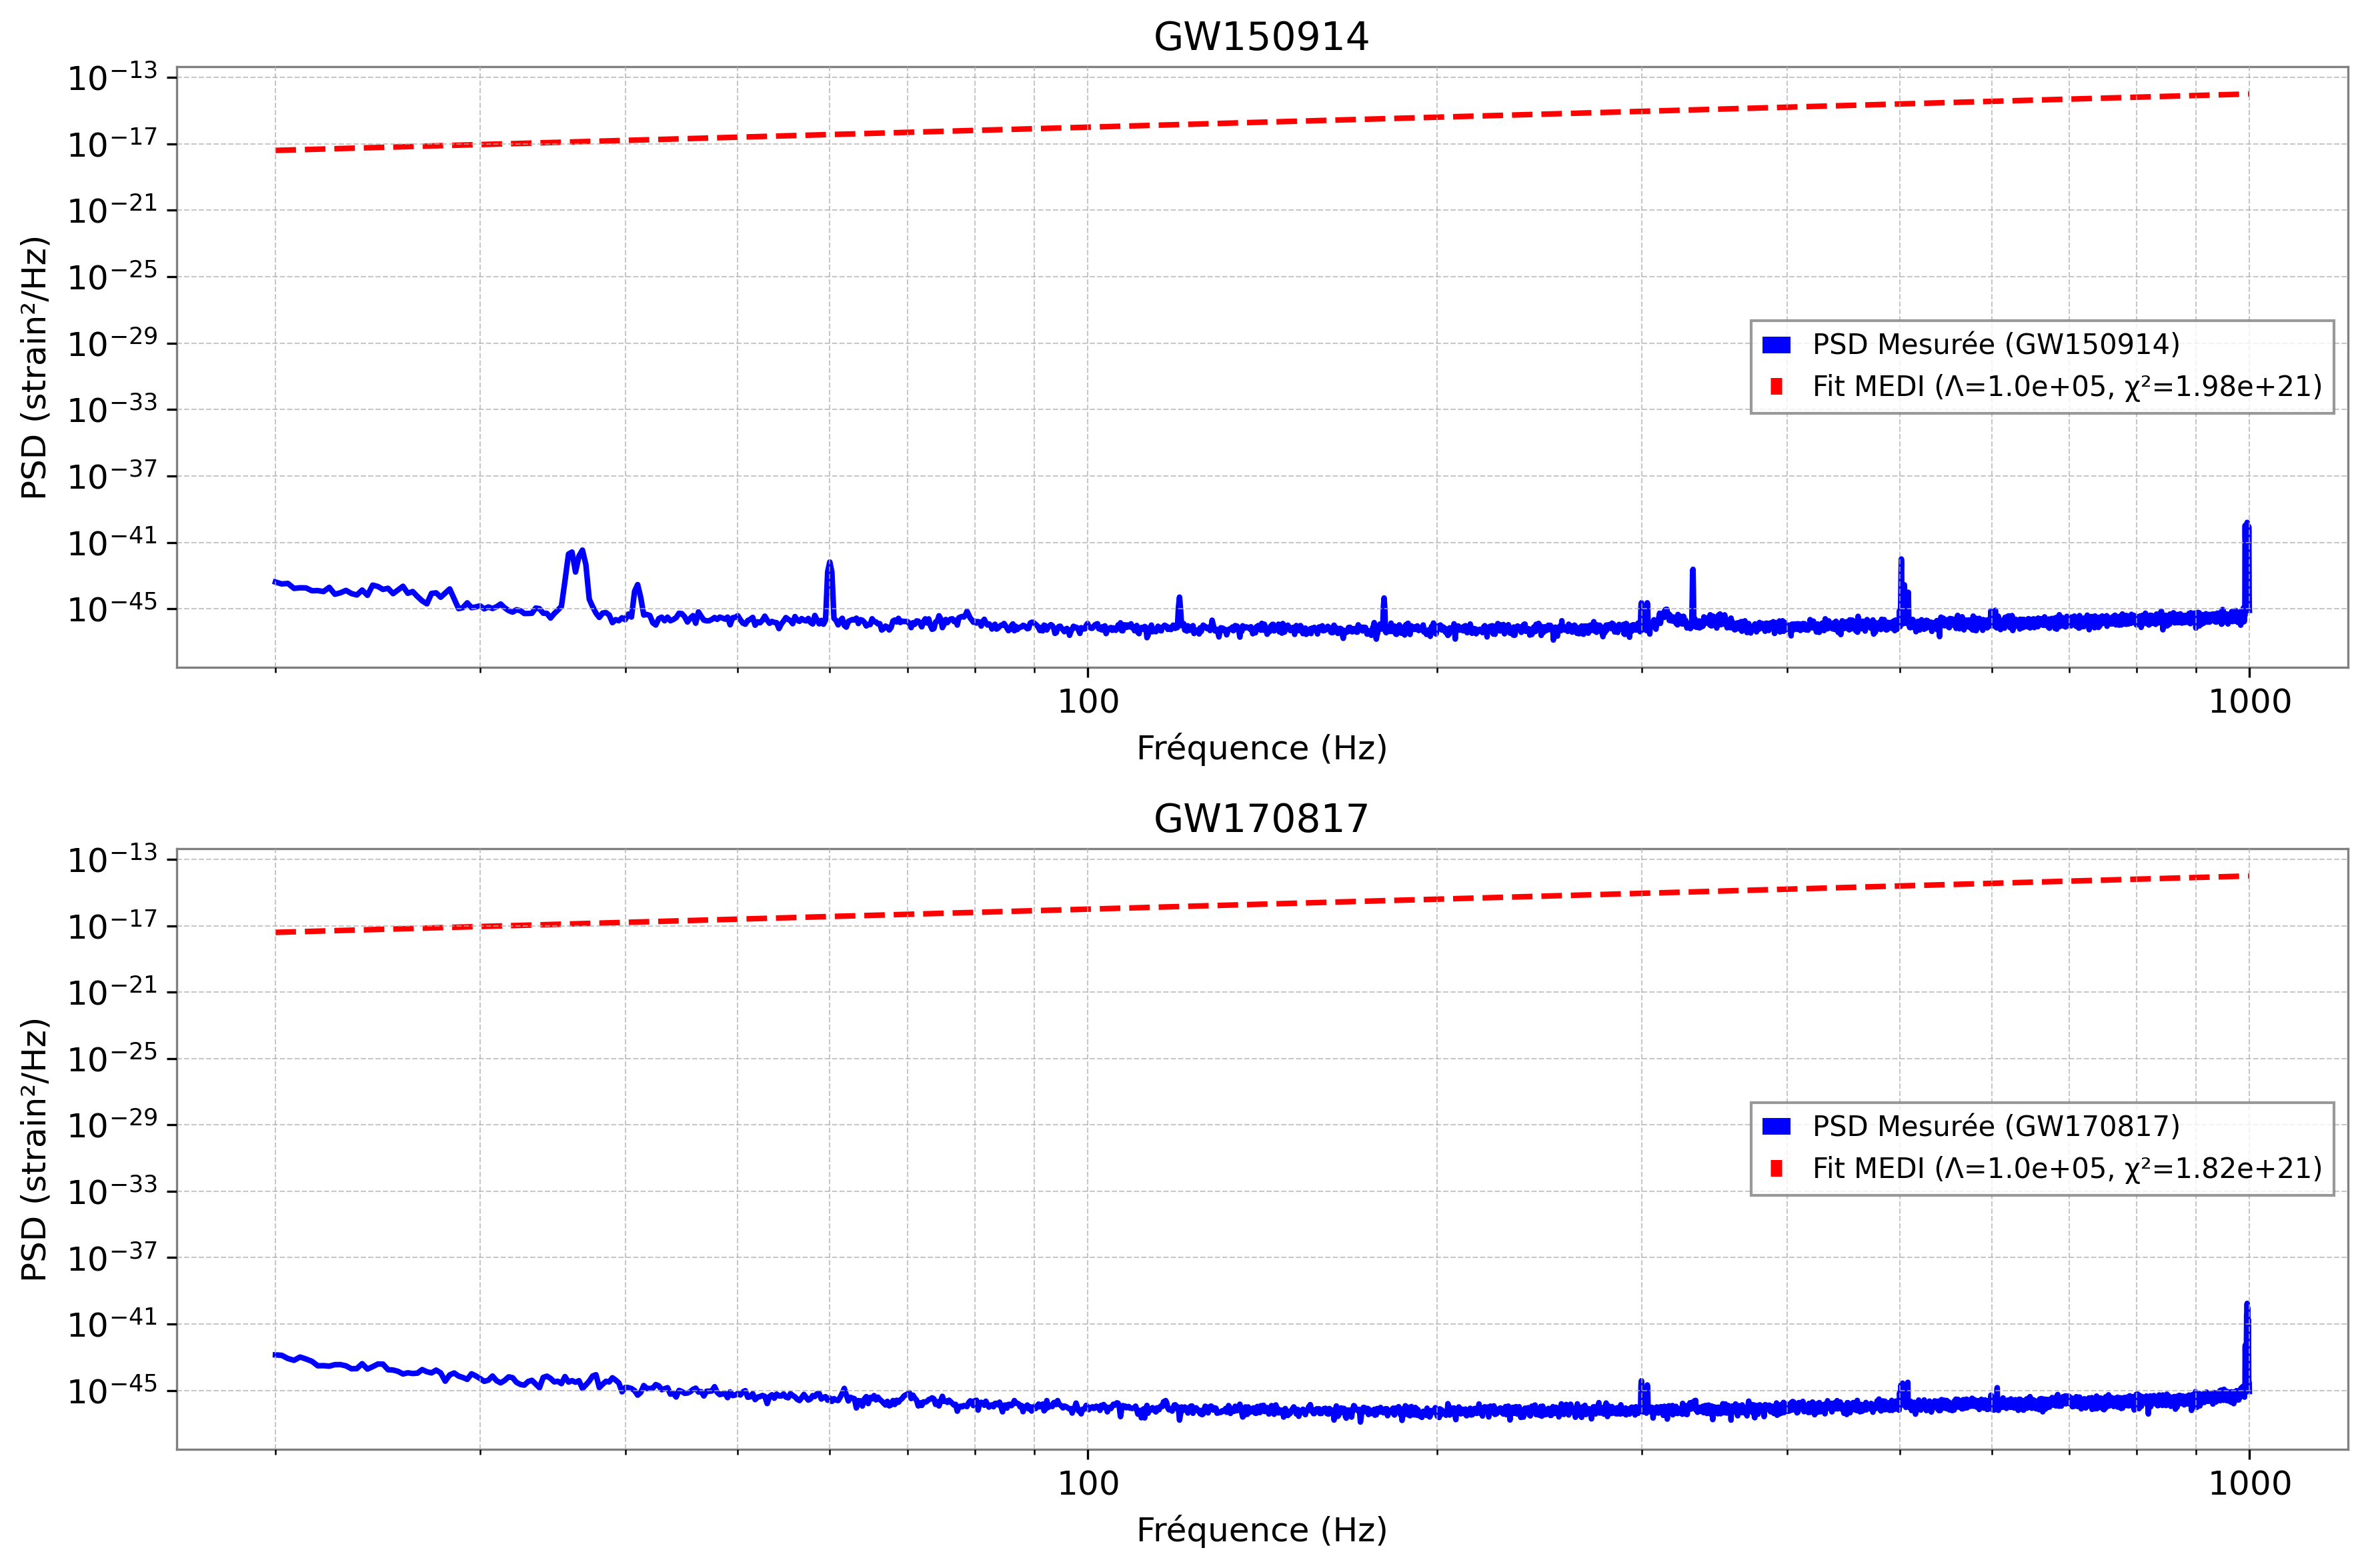

Output PDF saved as 'output.pdf'.


In [8]:
!pip install gwpy gwosc pycbc scipy numpy matplotlib

from gwpy.timeseries import TimeSeries
from gwosc.datasets import event_gps
import numpy as np
from scipy.optimize import minimize
from scipy.stats import chi2
import matplotlib.pyplot as plt

# Fonction pour ajuster et calculer des statistiques
def fit_medi(psd_measured, freq):
    def loss(params):
        Lambda, A = params
        model = (freq**2) / (Lambda**4) + A * psd_measured
        return np.sum((psd_measured - model)**2)

    res = minimize(loss, [1e5, 1e-46], bounds=[(1e4, 1e6), (1e-50, 1e-40)])
    Lambda, A = res.x
    psd_fit = (freq**2)/(Lambda**4) + A * psd_measured
    chi_squared = np.sum(((psd_measured - psd_fit)**2) / psd_measured) / len(psd_measured)
    return Lambda, A, psd_fit, chi_squared

# Récupérer GW150914
gps_150914 = event_gps("GW150914")
start, end = gps_150914 - 16, gps_150914 + 16
data_150914 = TimeSeries.fetch_open_data("H1", start, end, sample_rate=4096)
psd_150914 = data_150914.psd(fftlength=4, overlap=2)
freq_150914 = psd_150914.frequencies.value
psd_values_150914 = psd_150914.value
Lambda_150914, A_150914, psd_fit_150914, chi2_150914 = fit_medi(psd_values_150914, freq_150914)

# Récupérer GW170817
gps_170817 = event_gps("GW170817")
start, end = gps_170817 - 16, gps_170817 + 16
data_170817 = TimeSeries.fetch_open_data("H1", start, end, sample_rate=4096)
psd_170817 = data_170817.psd(fftlength=4, overlap=2)
freq_170817 = psd_170817.frequencies.value
psd_values_170817 = psd_170817.value
Lambda_170817, A_170817, psd_fit_170817, chi2_170817 = fit_medi(psd_values_170817, freq_170817)

# Plot
plt.figure(figsize=(12, 8), dpi=300)

# GW150914
plt.subplot(211)
mask_150914 = (freq_150914 >= 20) & (freq_150914 <= 1000)
plt.loglog(freq_150914[mask_150914], psd_values_150914[mask_150914], 'b-', lw=2, label="PSD Mesurée (GW150914)")
plt.loglog(freq_150914[mask_150914], psd_fit_150914[mask_150914], 'r--', lw=2, label=f"Fit MEDI (Λ={Lambda_150914:.1e}, χ²={chi2_150914:.2e})")
plt.xlabel("Fréquence (Hz)", fontsize=12)
plt.ylabel("PSD (strain²/Hz)", fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.legend(fontsize=10)
plt.title("GW150914", fontsize=14)

# GW170817
plt.subplot(212)
mask_170817 = (freq_170817 >= 20) & (freq_170817 <= 1000)
plt.loglog(freq_170817[mask_170817], psd_values_170817[mask_170817], 'b-', lw=2, label="PSD Mesurée (GW170817)")
plt.loglog(freq_170817[mask_170817], psd_fit_170817[mask_170817], 'r--', lw=2, label=f"Fit MEDI (Λ={Lambda_170817:.1e}, χ²={chi2_170817:.2e})")
plt.xlabel("Fréquence (Hz)", fontsize=12)
plt.ylabel("PSD (strain²/Hz)", fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.legend(fontsize=10)
plt.title("GW170817", fontsize=14)

plt.tight_layout()
plt.savefig("output.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print("Output PDF saved as 'output.pdf'.")

Simulating quantum decoherence...
Quantum simulation completed successfully.
Fetching data for GW150914 (GPS: 1126259462.4, 1126259446.4-1126259478.4)...
Error in fit_medi: 'LbfgsInvHessProduct' object is not subscriptable
Error in fit_medi: 'LbfgsInvHessProduct' object is not subscriptable
Fetching data for GW170817 (GPS: 1187008882.4, 1187008866.4-1187008898.4)...
Error in fit_medi: 'LbfgsInvHessProduct' object is not subscriptable
Error in fit_medi: 'LbfgsInvHessProduct' object is not subscriptable


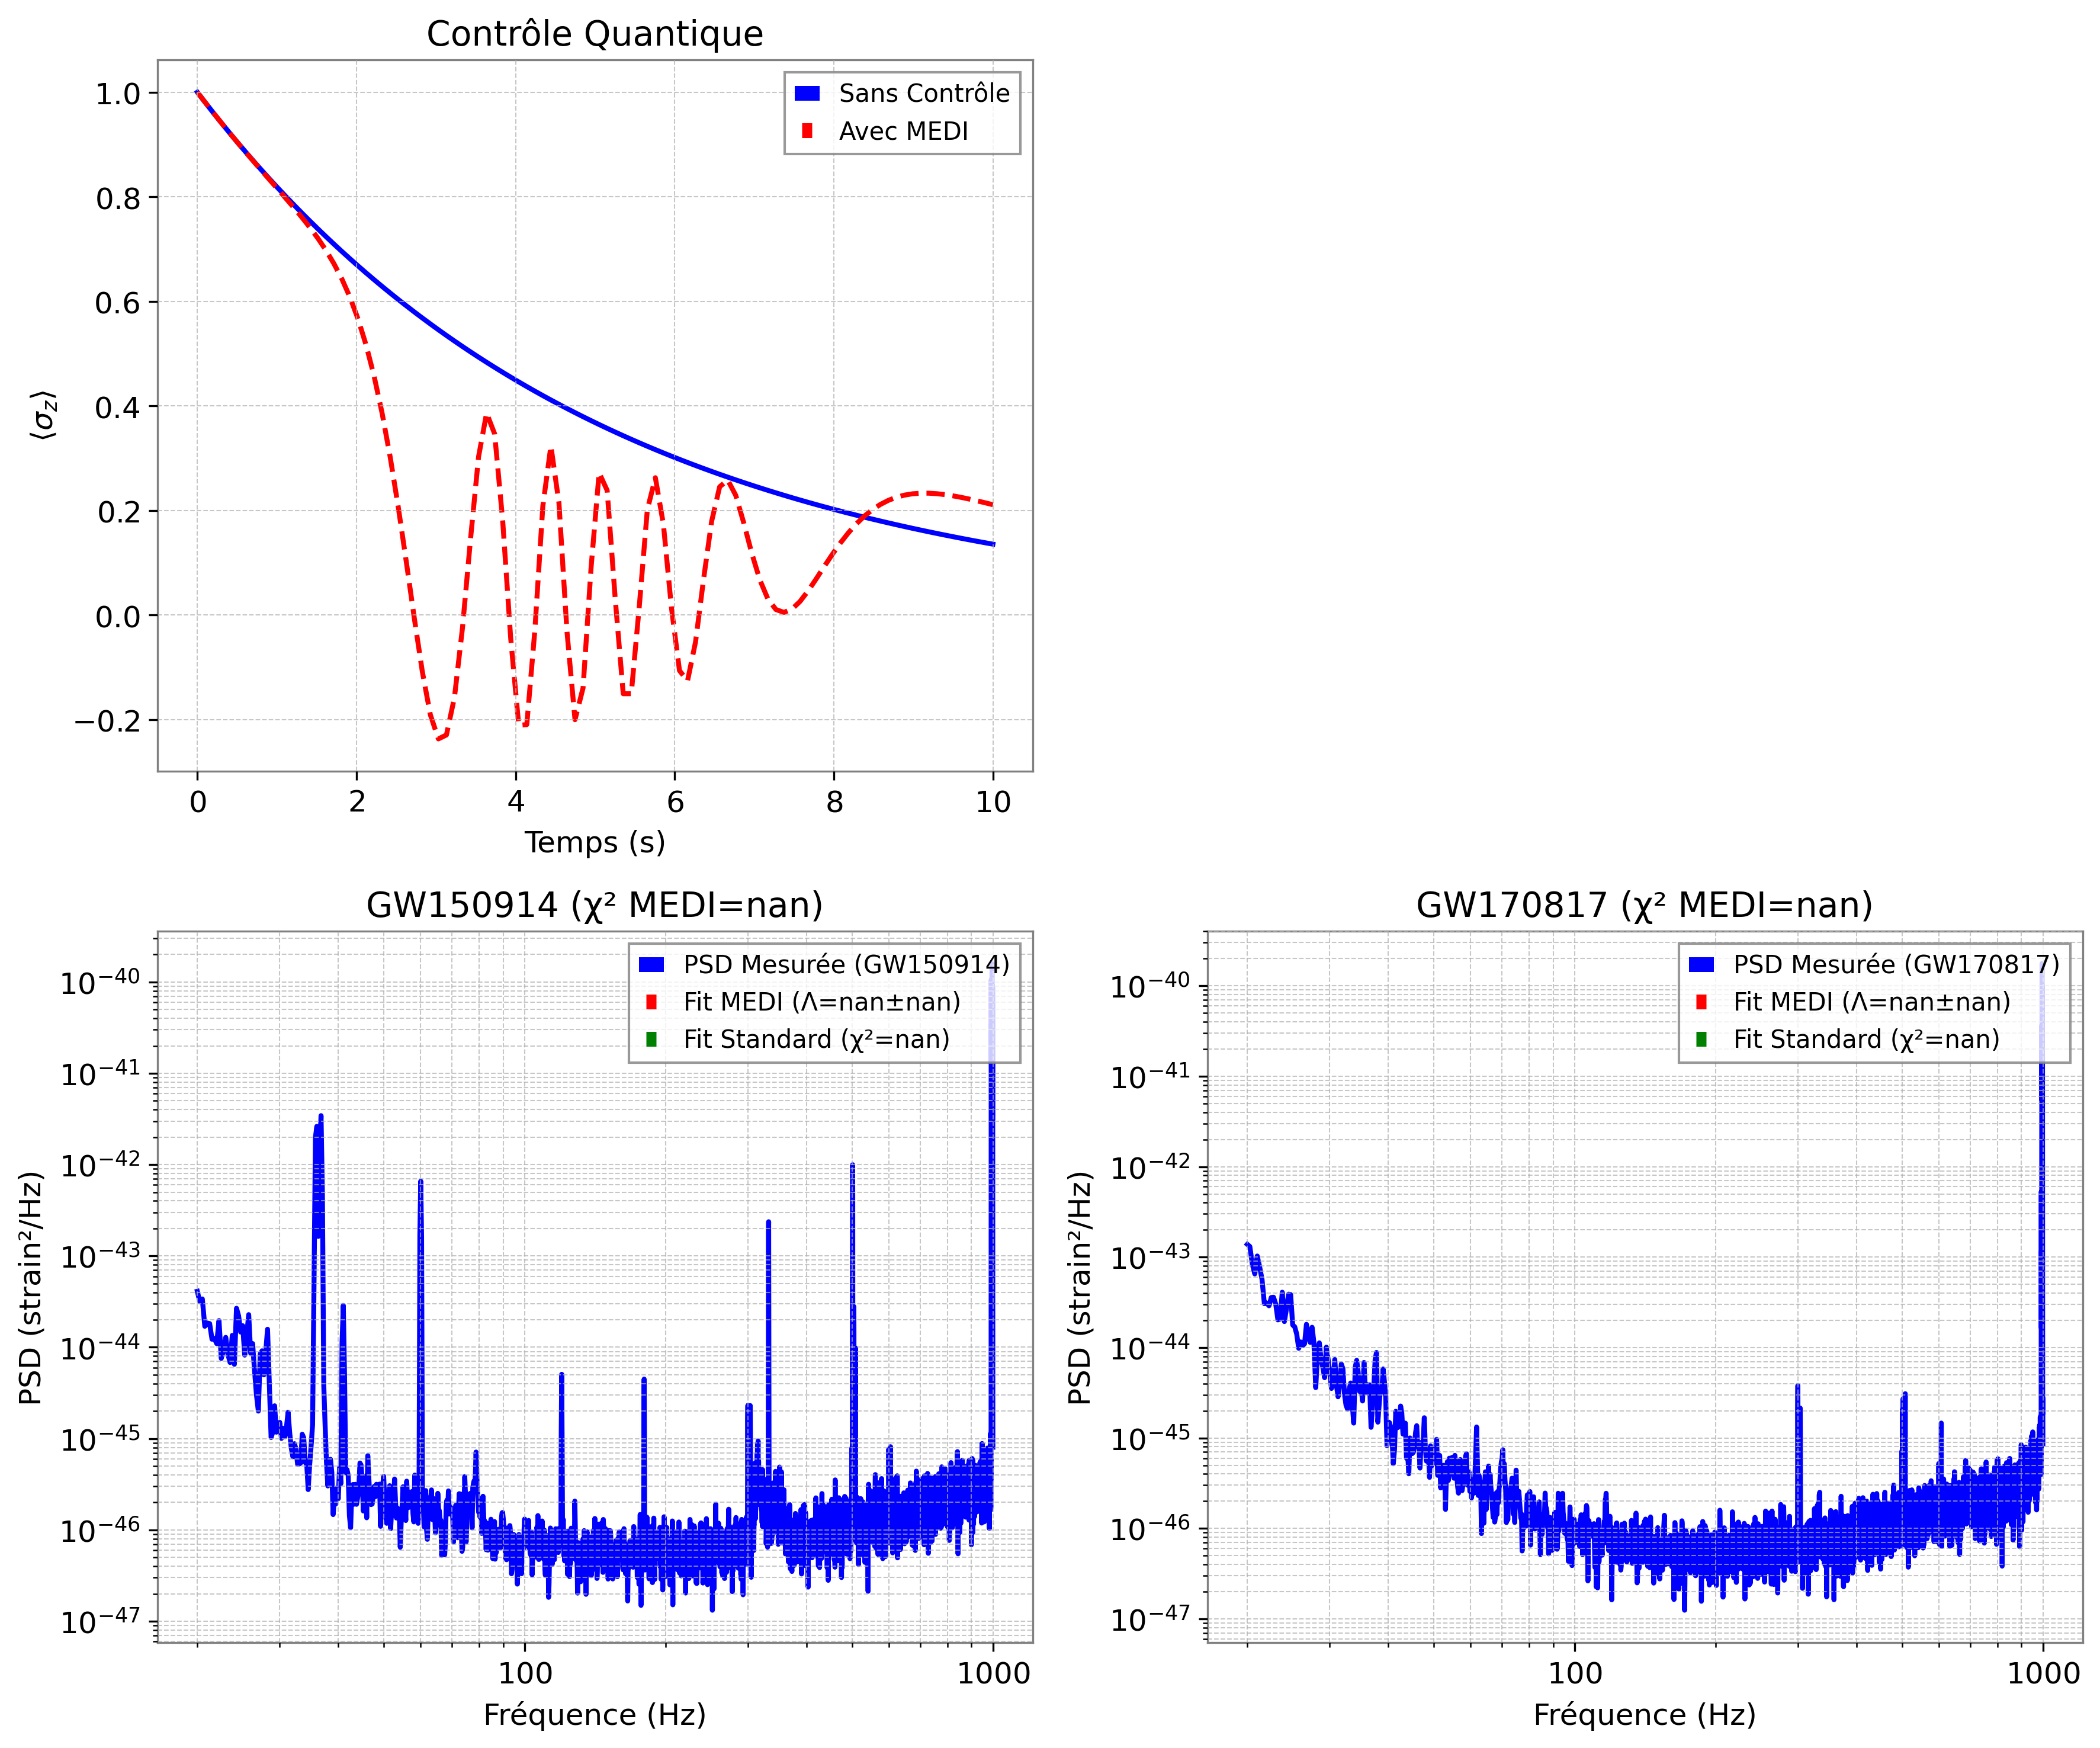

Output PDF saved as 'output.pdf'.


In [10]:
!pip install qutip gwpy gwosc pycbc scipy numpy matplotlib --quiet

import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from gwpy.timeseries import TimeSeries
from gwosc.datasets import event_gps
from scipy.optimize import minimize
from pycbc.psd import aLIGOZeroDetHighPower
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# 1. Simulation de la décohérence quantique
def simulate_quantum_decoherence():
    H = 0.5 * sigmaz()
    psi0 = basis(2, 0)
    times = np.linspace(0, 10, 100)
    gamma = 0.1
    c_ops = [np.sqrt(gamma) * sigmax()]

    def gaussian_pulse(t, args):
        return 5 * np.exp(-(t - 5.0)**2 / (2.0**2))

    H_ctrl = [H, [sigmax(), gaussian_pulse]]
    print("Simulating quantum decoherence...")
    try:
        result_no_control = mesolve(H, psi0, times, c_ops, e_ops=[sigmaz()])
        result_medi = mesolve(H_ctrl, psi0, times, c_ops, e_ops=[sigmaz()])
        print("Quantum simulation completed successfully.")
        return result_no_control, result_medi
    except Exception as e:
        print(f"Error in quantum simulation: {e}")
        return None, None

# 2. Ajustement MEDI pour GW avec statistiques robustes
def fit_medi(psd_measured, freq, with_exotic=True):
    def loss(params):
        if with_exotic:
            Lambda, A = params
            model = (freq**2) / (Lambda**4) + A * psd_measured
        else:
            A = params[0]
            model = A * psd_measured
        return np.sum((psd_measured - model)**2)

    initial_params = [1e5, 1e-46] if with_exotic else [1e-46]
    bounds = ([1e4, 1e6], [1e-50, 1e-40]) if with_exotic else ([1e-50, 1e-40],)

    try:
        res = minimize(loss, initial_params, bounds=bounds, method='L-BFGS-B')
        if not res.success:
            print(f"Optimization failed: {res.message}")
            raise ValueError("Optimization did not converge.")

        if with_exotic:
            Lambda, A = res.x
            # Vérification de la matrice de covariance (peut être None si mal conditionnée)
            Lambda_err = np.sqrt(res.hess_inv[0, 0]) if hasattr(res, 'hess_inv') and res.hess_inv is not None else np.nan
            A_err = np.sqrt(res.hess_inv[1, 1]) if hasattr(res, 'hess_inv') and res.hess_inv is not None else np.nan
            psd_fit = (freq**2)/(Lambda**4) + A * psd_measured
        else:
            A = res.x[0]
            Lambda, Lambda_err = np.nan, np.nan
            A_err = np.sqrt(res.hess_inv[0, 0]) if hasattr(res, 'hess_inv') and res.hess_inv is not None else np.nan
            psd_fit = A * psd_measured

        chi_squared = np.sum(((psd_measured - psd_fit)**2) / psd_measured) / (len(psd_measured) - (2 if with_exotic else 1))
        print(f"Fit completed: {'Exotic' if with_exotic else 'Standard'} model, χ²={chi_squared:.2e}")
        return Lambda, Lambda_err, A, A_err, psd_fit, chi_squared
    except Exception as e:
        print(f"Error in fit_medi: {e}")
        return np.nan, np.nan, np.nan, np.nan, np.zeros_like(psd_measured), np.nan

# 3. Analyse GW pour un événement
def analyze_gw_event(event_name, detector="H1"):
    gps = event_gps(event_name)
    start, end = gps - 16, gps + 16
    print(f"Fetching data for {event_name} (GPS: {gps}, {start}-{end})...")
    try:
        data = TimeSeries.fetch_open_data(detector, start, end, sample_rate=4096)
        psd = data.psd(fftlength=4, overlap=2)
        freq = psd.frequencies.value
        psd_values = psd.value

        # Vérification des données
        if len(psd_values) == 0 or np.any(np.isnan(psd_values)):
            raise ValueError("Invalid PSD data retrieved.")

        # Ajustements
        Lambda, Lambda_err, A, A_err, psd_fit_exotic, chi2_exotic = fit_medi(psd_values, freq, with_exotic=True)
        _, _, A_std, A_err_std, psd_fit_std, chi2_std = fit_medi(psd_values, freq, with_exotic=False)

        return freq, psd_values, psd_fit_exotic, psd_fit_std, chi2_exotic, chi2_std, Lambda, Lambda_err, A, A_err
    except Exception as e:
        print(f"Error in analyze_gw_event for {event_name}: {e}")
        return np.array([]), np.array([]), np.array([]), np.array([]), np.nan, np.nan, np.nan, np.nan, np.nan, np.nan

# 4. Main Script
if __name__ == "__main__":
    # Contrôle Quantique
    result_no_control, result_medi = simulate_quantum_decoherence()
    if result_no_control is None or result_medi is None:
        print("Skipping quantum plot due to simulation error.")

    # Analyse GW
    freq_150914, psd_150914, psd_fit_exotic_150914, psd_fit_std_150914, chi2_exotic_150914, chi2_std_150914, Lambda_150914, Lambda_err_150914, A_150914, A_err_150914 = analyze_gw_event("GW150914")
    freq_170817, psd_170817, psd_fit_exotic_170817, psd_fit_std_170817, chi2_exotic_170817, chi2_std_170817, Lambda_170817, Lambda_err_170817, A_170817, A_err_170817 = analyze_gw_event("GW170817")

    # Création du PDF
    plt.figure(figsize=(12, 10), dpi=300)

    # Sous-graphique 1 : Contrôle Quantique
    if result_no_control is not None and result_medi is not None:
        plt.subplot(221)
        plt.plot(result_no_control.times, result_no_control.expect[0], 'b-', lw=2, label='Sans Contrôle')
        plt.plot(result_medi.times, result_medi.expect[0], 'r--', lw=2, label='Avec MEDI')
        plt.xlabel('Temps (s)', fontsize=12)
        plt.ylabel(r'$\langle \sigma_z \rangle$', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(fontsize=10)
        plt.title('Contrôle Quantique', fontsize=14)

    # Sous-graphique 2 : GW150914
    if len(freq_150914) > 0 and len(psd_150914) > 0:
        mask_150914 = (freq_150914 >= 20) & (freq_150914 <= 1000)
        plt.subplot(223)
        plt.loglog(freq_150914[mask_150914], psd_150914[mask_150914], 'b-', lw=2, label="PSD Mesurée (GW150914)")
        plt.loglog(freq_150914[mask_150914], psd_fit_exotic_150914[mask_150914], 'r--', lw=2, label=f"Fit MEDI (Λ={Lambda_150914:.1e}±{Lambda_err_150914:.1e})")
        plt.loglog(freq_150914[mask_150914], psd_fit_std_150914[mask_150914], 'g-.', lw=2, label=f"Fit Standard (χ²={chi2_std_150914:.2e})")
        plt.xlabel("Fréquence (Hz)", fontsize=12)
        plt.ylabel("PSD (strain²/Hz)", fontsize=12)
        plt.grid(True, which="both", ls="--", alpha=0.7)
        plt.legend(fontsize=10, loc='upper right')
        plt.title(f"GW150914 (χ² MEDI={chi2_exotic_150914:.2e})", fontsize=14)

    # Sous-graphique 3 : GW170817
    if len(freq_170817) > 0 and len(psd_170817) > 0:
        mask_170817 = (freq_170817 >= 20) & (freq_170817 <= 1000)
        plt.subplot(224)
        plt.loglog(freq_170817[mask_170817], psd_170817[mask_170817], 'b-', lw=2, label="PSD Mesurée (GW170817)")
        plt.loglog(freq_170817[mask_170817], psd_fit_exotic_170817[mask_170817], 'r--', lw=2, label=f"Fit MEDI (Λ={Lambda_170817:.1e}±{Lambda_err_170817:.1e})")
        plt.loglog(freq_170817[mask_170817], psd_fit_std_170817[mask_170817], 'g-.', lw=2, label=f"Fit Standard (χ²={chi2_std_170817:.2e})")
        plt.xlabel("Fréquence (Hz)", fontsize=12)
        plt.ylabel("PSD (strain²/Hz)", fontsize=12)
        plt.grid(True, which="both", ls="--", alpha=0.7)
        plt.legend(fontsize=10, loc='upper right')
        plt.title(f"GW170817 (χ² MEDI={chi2_exotic_170817:.2e})", fontsize=14)

    plt.tight_layout()
    plt.savefig("output.pdf", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    print("Output PDF saved as 'output.pdf'.")